In [2]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import datasets
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
housing_data = datasets.load_boston()

In [6]:
housing_data.data.shape
#housing_data.target

(506, 13)

In [7]:
# Let's separate this into input and output. To make this independent of the ordering of the data,
# let's shuffle it as well

X, y = shuffle(housing_data.data, housing_data.target, random_state=7)

# The random_state parameter controls how we shuffle the data so that we can have reproducible results.

In [10]:
num_training = int(0.8 * len(X))
X_train, y_train = X[:num_training], y[:num_training]
X_test, y_test = X[num_training:], y[num_training:]

In [12]:
dt_regressor = DecisionTreeRegressor(max_depth=4)  # 选择深度为4
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [13]:
# Let's also fit decision tree regression model with AdaBoost
ad_regressor = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),n_estimators=400, random_state=7)
ad_regressor.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=400,
         random_state=7)

In [15]:
y_pred_dt = dt_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred_dt)
evs = explained_variance_score(y_test, y_pred_dt)
print("\n#### Decision Tree performance ####")
print("Mean squared error =", round(mse,2))
print("Explained variance score =", round(evs,2))


#### Decision Tree performance ####
Mean squared error = 14.79
Explained variance score = 0.82


In [16]:
y_pred_ad = ad_regressor.predict(X_test)
mse_ad = mean_squared_error(y_test, y_pred_ad)
esv_ad = explained_variance_score(y_test, y_pred_ad)
print('\n#### AdaBoost performance ####')
print("Mean squared error =", round(mse_ad,2))
print("Expalined variance score =", round(esv_ad,2))


#### AdaBoost performance ####
Mean squared error = 7.64
Expalined variance score = 0.91


# Computing the relative importance of features

Are all the features equally important?

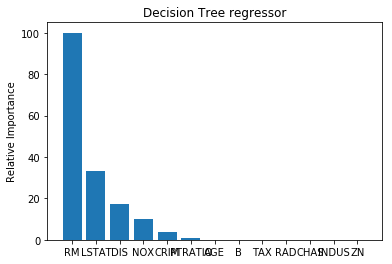

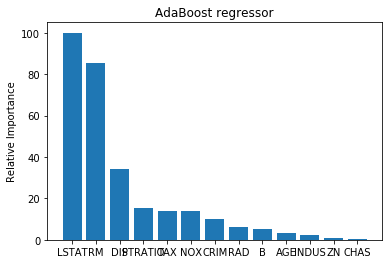

In [17]:
def plot_feature_importances(feature_importances, title, feature_names):
    # Normalize the importance values
    feature_importances = 100.0 * (feature_importances / max(feature_importances))
    
    # Sort the values and flip them
    index_sorted = np.flipud(np.argsort(feature_importances))
    
    # Center the location of the labels on the X-axis
    pos = np.arange(index_sorted.shape[0]) + 0.5
    
    # Plot the bar graph
    plt.figure()
    plt.bar(pos, feature_importances[index_sorted], align='center')
    plt.xticks(pos, feature_names[index_sorted])
    plt.ylabel('Relative Importance')
    plt.title(title)
    plt.show()




# Plot relative feature importances
plot_feature_importances(dt_regressor.feature_importances_, 'Decision Tree regressor', housing_data.feature_names)
plot_feature_importances(ad_regressor.feature_importances_, "AdaBoost regressor", housing_data.feature_names)